Module 12 Challenge
Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as Soup
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
browser = Browser('chrome')

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [4]:
# Create a Beautiful Soup Object
html = browser.html

soup = Soup(html, 'html.parser')

In [5]:
# Extract all rows of data
mars_table = soup.find('table', class_ = 'table')
print(mars_table)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [6]:
#Alternate way of extracting data from a website 

df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')

In [7]:
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
data_table = mars_table.find('td')
data_table

<td>2</td>

In [9]:
# Create an empty list
header_list = []
data_list = []

# Loop to extract header data 
header_row = mars_table.find('tr')
for th in header_row.find_all('th'):
    header_list.append(th.text.strip())
    
#Loop to extract data rows
data_row = mars_table.find_all('tr')[1:]
for row in data_row:
    row_data = []
    for td in row.find_all('td'):
        row_data.append(td.text.strip())
    data_list.append(row_data)
    
loop_df = pd.DataFrame(data_list,columns=header_list)
    


In [10]:
#Checking to see if list was created correctly 
#data_list
header_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [11]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
table_df = pd.DataFrame(data_list,columns=header_list)
table_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [12]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [13]:
# Examine data type of each column
mars_df.dtypes
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [14]:
# Change data types for data analysis
mars_df['terrestrial_date'] = mars_df['terrestrial_date'].astype('datetime64')

In [15]:
# Confirm type changes were successful by examining data types again
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [16]:
#Reprinting head so I can see the columns im working with 
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [17]:
# 1. How many months are there on Mars?
month_count =mars_df.groupby(['month']).count()['min_temp']
month_count

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: min_temp, dtype: int64

In [18]:
month_count_df = mars_df.groupby(['month'])
month_count_df['month'].value_counts()

month  month
1      1        174
2      2        178
3      3        192
4      4        194
5      5        149
6      6        147
7      7        142
8      8        141
9      9        134
10     10       112
11     11       138
12     12       166
Name: month, dtype: int64

In [19]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_df['month'].count()
martian_days 

1867

In [20]:
# 3. What is the average low temperature by month?
low_avg_temp = mars_df.groupby(['month']).mean()['min_temp']
low_avg_temp

/var/folders/w9/1qf67rw90dgbqv7rkw546lvh0000gn/T/ipykernel_73148/2597752560.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  low_avg_temp = mars_df.groupby(['month']).mean()['min_temp']


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<Axes: xlabel='month', ylabel='Temperature in Celsius'>

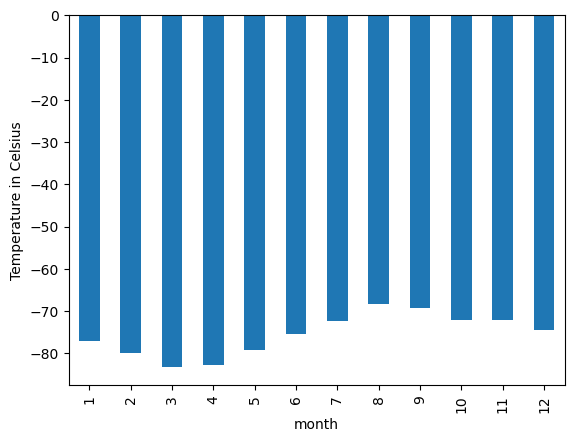

In [21]:
# Plot the average temperature by month

low_avg_temp.plot.bar(ylabel='Temperature in Celsius')

In [22]:
# Identify the coldest and hottest months in Curiosity's location
sorted_low_avg_temp = low_avg_temp.sort_values()
sorted_low_avg_temp

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

<Axes: xlabel='month', ylabel='Temperatures in Celsius'>

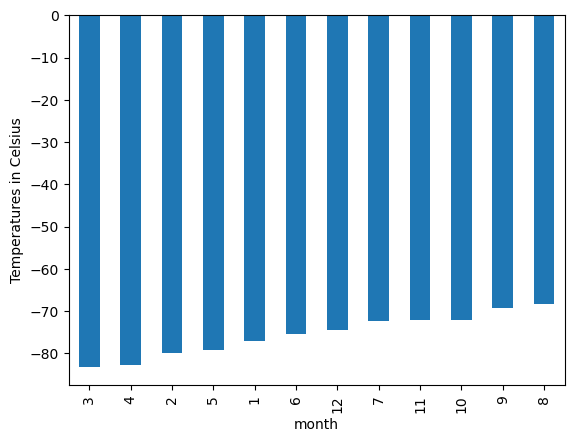

In [23]:
#coldest and hottest months in Curiosity's location
sorted_low_avg_temp.plot.bar(ylabel='Temperatures in Celsius')

In [24]:
# 4. Average pressure by Martian month
avg_pressure_by_month = mars_df.groupby(['month']).mean()['pressure']
avg_pressure_by_month

/var/folders/w9/1qf67rw90dgbqv7rkw546lvh0000gn/T/ipykernel_73148/21959525.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_pressure_by_month = mars_df.groupby(['month']).mean()['pressure']


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Axes: xlabel='month', ylabel='Atmospheric Pressure'>

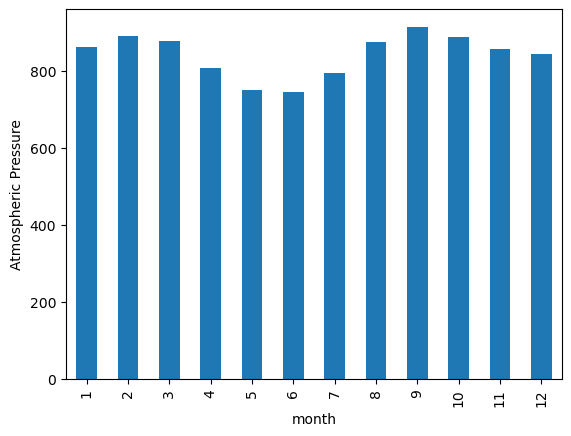

In [25]:
# Plot the average pressure by month
avg_pressure_by_month.plot.bar(ylabel= 'Atmospheric Pressure')

In [26]:
#Creating a groupby so I can plot min_temp with days on Mars S
temp_terrestrial_days = mars_df.groupby(['month'])['min_temp']
temp_terrestrial_days

<Axes: xlabel='Number of terrestrial days', ylabel='Minimum Temperature'>

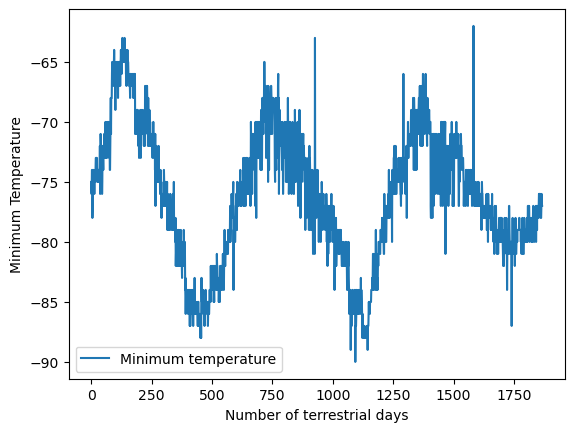

In [27]:
#terrestrial (earth) days are there in a Martian year

terrestrial_days_df = pd.DataFrame({'Minimum temperature': mars_df['min_temp']})
terrestrial_days_df.plot.line(ylabel="Minimum Temperature", xlabel="Number of terrestrial days")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

In [28]:
mars_df.to_csv('mars_csv.csv')

In [29]:
browser.quit()